<a href="https://colab.research.google.com/github/rychard-coder/-Trabalho_SAD-/blob/main/Rychard_Malfer_Entrega_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install adjustText

In [ ]:
pip install catboost

In [ ]:
pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
import datetime
import calendar
from matplotlib.ticker import PercentFormatter
import geopandas as gpd
import re
import adjustText as aT
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn import metrics
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from catboost.utils import get_confusion_matrix
from catboost import cv
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Caminho do arquivo
file_path = '/content/drive/MyDrive/SAD/Base_SAD.csv'

try:
    # Carregar CSV com delimitador correto, encoding e ignorando linhas problemáticas
    df = pd.read_csv(file_path, delimiter=';', encoding='latin1', on_bad_lines='skip')

    # Exibindo número de linhas e colunas para verificação
    num_rows, num_cols = df.shape
    print("Número de linhas:", num_rows)
    print("Número de colunas:", num_cols)

    # Exibindo as primeiras linhas do DataFrame
    print(df.head())

    # Prossiga com o restante das análises ou manipulações no DataFrame
    # Exemplo: verificando informações básicas
    print("Informações gerais sobre o DataFrame:")
    print(df.info())

except Exception as e:
    print(f"Erro ao carregar o arquivo: {e}")

Número de linhas: 9546
Número de colunas: 8
   Student ID Student Country  Question ID  Type of Answer Question Level  \
0         647         Ireland           77               0          Basic   
1          41        Portugal           77               1          Basic   
2         340        Portugal           77               1          Basic   
3         641           Italy           77               0          Basic   
4         669        Portugal           77               1          Basic   

        Topic    Subtopic                                           Keywords  
0  Statistics  Statistics  Stem and Leaf diagram,Relative frequency,Sampl...  
1  Statistics  Statistics  Stem and Leaf diagram,Relative frequency,Sampl...  
2  Statistics  Statistics  Stem and Leaf diagram,Relative frequency,Sampl...  
3  Statistics  Statistics  Stem and Leaf diagram,Relative frequency,Sampl...  
4  Statistics  Statistics  Stem and Leaf diagram,Relative frequency,Sampl...  
Informações gerais 

Mounted at /content/drive
   Student ID Student Country  Question ID  Type of Answer Question Level  \
0         647         Ireland           77               0          Basic   
1          41        Portugal           77               1          Basic   
2         340        Portugal           77               1          Basic   
3         641           Italy           77               0          Basic   
4         669        Portugal           77               1          Basic   
5         697        Portugal           77               1          Basic   
6         720        Portugal           77               1          Basic   
7         675        Portugal           77               1          Basic   
8         663        Portugal           77               0          Basic   
9          28        Portugal           77               0          Basic   

        Topic    Subtopic                                           Keywords  
0  Statistics  Statistics  Stem and Leaf diagra

,Coluna,Tipo de Dado,Valores Ausentes,Valores Únicos
0,Student ID,int64,0,372
1,Student Country,object,0,8
2,Question ID,int64,0,833
3,Type of Answer,int64,0,2
4,Question Level,object,0,2
5,Topic,object,0,14
6,Subtopic,object,0,24
7,Keywords,object,0,365


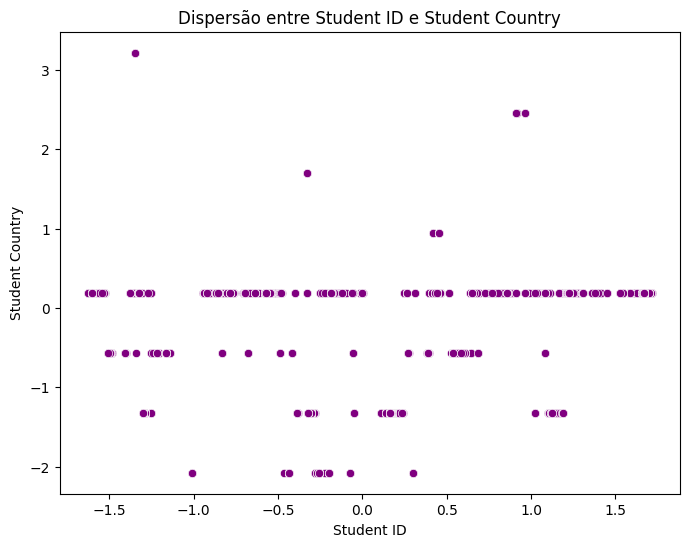

In [ ]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from google.colab import drive
import os
from scipy import stats
import IPython.display as display

# Montar o Google Drive
drive.mount('/content/drive', force_remount=True)

# Caminho para o arquivo CSV no Google Drive
file_path = '/content/drive/MyDrive/SAD/Base_SAD.csv'

# Ler o arquivo CSV em um DataFrame
df = pd.read_csv(file_path, delimiter=';', encoding='latin1', on_bad_lines='skip')

# Mostrar as primeiras 10 linhas do DataFrame
print(df.head(10))

# Obter o número de linhas e colunas do DataFrame
num_rows, num_cols = df.shape
print("Número de linhas:", num_rows)
print("Número de colunas:", num_cols)

# Obtendo o tamanho do arquivo em KB
file_size_kb = os.path.getsize(file_path) / 1024
print("Tamanho do arquivo (KB):", file_size_kb)

# Exibir informações sobre cada coluna e tipo de dado
df.info()

# Diagnóstico inicial do DataFrame
print("\n### Diagnóstico Inicial ###")
print(f"Colunas disponíveis: {df.columns.tolist()}")
print(f"Quantidade de linhas: {df.shape[0]}")
print(f"Quantidade de colunas: {df.shape[1]}")

# Verificar valores ausentes, tipos de dados e outliers para cada coluna
print("\n### Pré-processamento ###")
for coluna in df.columns:
    print(f"\nColuna: {coluna}")
    print(f" - Tipo de dado: {df[coluna].dtype}")
    print(f" - Valores ausentes: {df[coluna].isnull().sum()}")
    print(f" - Valores únicos: {df[coluna].nunique()}")

    # Verificação de outliers usando o método IQR
    if df[coluna].dtype in ['int64', 'float64']:  # Somente para colunas numéricas
        Q1 = df[coluna].quantile(0.25)
        Q3 = df[coluna].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[coluna] < lower_bound) | (df[coluna] > upper_bound)]
        print(f" - Outliers: {outliers.shape[0]}")
    else:
        print(" - Esta coluna não é numérica, logo não há outliers a verificar.")

# Criar uma tabela de pré-processamento
preprocessing_summary = pd.DataFrame({
    'Coluna': df.columns,
    'Tipo de Dado': [df[col].dtype for col in df.columns],
    'Valores Ausentes': [df[col].isnull().sum() for col in df.columns],
    'Valores Únicos': [df[col].nunique() for col in df.columns]
})

# Exibir a tabela de pré-processamento
print("\n### Tabela de Pré-processamento ###")
display.display(preprocessing_summary)

# Lidar com valores faltantes (exemplo usando a mediana para numéricos e modo para categóricos)
for coluna in df.columns:
    if df[coluna].dtype in ['int64', 'float64']:
        df[coluna] = df[coluna].fillna(df[coluna].median())
    elif df[coluna].dtype == 'object':
        df[coluna] = df[coluna].fillna(df[coluna].mode()[0])

# Converter variáveis categóricas para numéricas
label_encoders = {}
for coluna in df.select_dtypes(include=['object']).columns:
    # Garantir que todas as entradas sejam strings
    df[coluna] = df[coluna].astype(str)
    le = LabelEncoder()
    df[coluna] = le.fit_transform(df[coluna])
    label_encoders[coluna] = le

# Normalizar variáveis numéricas
scaler = StandardScaler()
df[df.select_dtypes(include=['int64', 'float64']).columns] = scaler.fit_transform(df.select_dtypes(include=['int64', 'float64']))

# Dividir os dados em conjuntos de treino e teste
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Visualização de dados


# 1. Gráfico de dispersão entre duas variáveis numéricas
plt.figure(figsize=(8, 6))
sbn.scatterplot(x=df[numerical_columns[0]], y=df[numerical_columns[1]], color='purple')
plt.title(f'Dispersão entre {numerical_columns[0]} e {numerical_columns[1]}')
plt.xlabel(numerical_columns[0])
plt.ylabel(numerical_columns[1])
plt.show()